### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

In [2]:
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url)
print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  KD_SBR TP_TRN  KDSUP  KAS TRN_DK GDG   GGD  KDSLS      KEL     ITEM  ...  \
0     IN    JUL    NaN  6.0      K   A  AREA    NaN   KERTAS  39390.0  ...   
1     IN    JUL    NaN  6.0      K   A  AREA    NaN  BTL/DOT  13108.0  ...   
2     IN    JUL    NaN  6.0      K   A  AREA    NaN  MUSTIKA   5644.0  ...   
3     IN    JUL    NaN  6.0      K   A  AREA    NaN  SABUN.C   7273.0  ...   
4     IN    JUL    NaN  6.0      K   A  AREA    NaN  LULURMD  12168.0  ...   

  DEP_SWA  GON  KONS POST_STOK STATUS  TP_ADJ USER    TANGGAL       JAM  \
0     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:12:02   
1     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:24:51   
2     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:18   
3     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:22   
4     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:20   

   LAMA_CRD  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       Na

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
columns_to_drop = [
    'KD_SBR', 'TP_TRN', 'KDSUP', 'KAS', 'TRN_DK', 'GDG', 'GGD', 'KDSLS',
    'BIN', 'KDBIN', 'NO_ORD', 'STS_BYR', 'SLD_AK', 'SLD_AKG',
    'HRG_OLD', 'HRGBL_OLD', 'HRG_PKK', 'HRG_JUL', 'DISC', 'DISC1', 'DISC2',
    'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD', 'HRGJL2_OLD',
    'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN', 'PPN_OLD', 'PPNBM', 'PPNBM_OLD',
    'KET_TRANS', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS', 'TRNBL', 'POST',
    'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON', 'KONS', 'POST_STOK',
    'STATUS', 'TP_ADJ', 'USER', 'LAMA_CRD'
]
df = df.drop(columns=columns_to_drop)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,3
ITEM,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3


In [6]:
from sklearn.impute import SimpleImputer
# Membuat objek SimpleImputer dengan strategi 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Mengaplikasikan imputasi untuk mengisi nilai null dengan modus pada setiap kolom
df_imputed = imputer.fit_transform(df)

# Mengubah hasil imputasi kembali ke DataFrame untuk memudahkan penggunaan
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


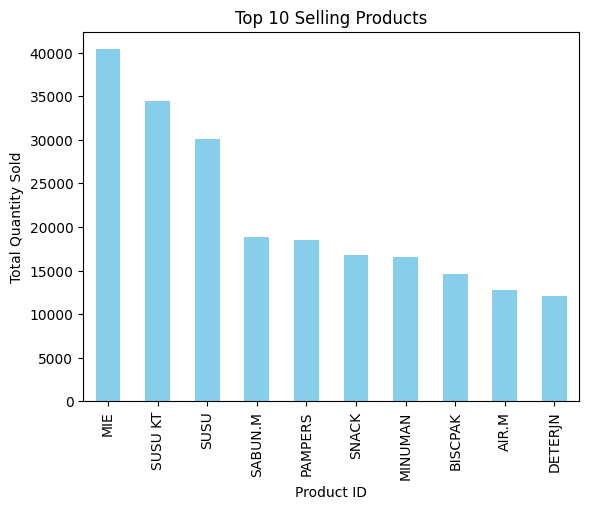

In [7]:
top_selling_products = df_imputed.groupby('KEL')['QTY'].sum().sort_values(ascending=False)
top_selling_products.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()

The chart shows the top 10 selling products by quantity. **Mie (Noodles)** is the best-seller, followed by **Susu KT (Milk)** and **Susu (Milk)**, indicating high demand for staple items. Mid-tier products like **Sabun M (Soap)** and **Pampers** show consistent sales, while lower-tier items like **Beverages**, **Biscpak (Biscuits)**, and **Detergent** complete the list.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


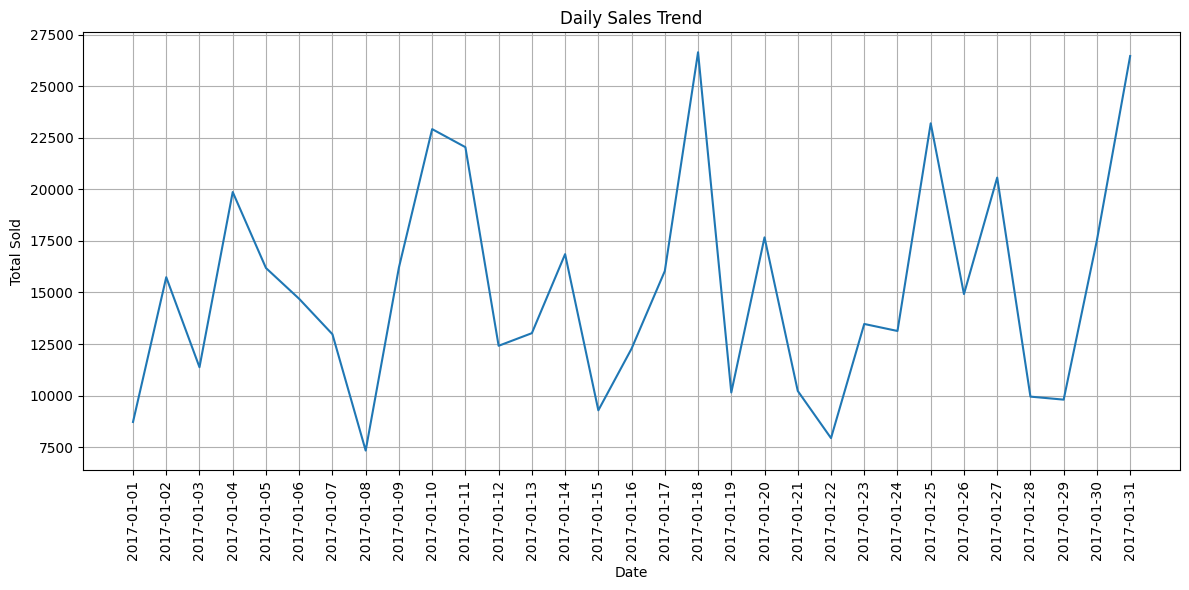

In [8]:
df_imputed['TGL_TRANS'] = pd.to_datetime(df_imputed['TGL_TRANS'])
df_imputed['Day'] = df_imputed['TGL_TRANS'].dt.date
df_imputed['DayName'] = df_imputed['TGL_TRANS'].dt.day_name()
daily_sales = df_imputed.groupby(['Day', 'DayName'])['QTY'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Day'].astype(str), daily_sales['QTY'], linestyle='-', marker='')

plt.xlabel('Date')
plt.ylabel('Total Sold')
plt.title('Daily Sales Trend')

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

The **Daily Sales Trend** chart shows fluctuations in sales, with peaks on January 8, January 17, and January 31, indicating high sales days. The dips between these peaks suggest inconsistent sales patterns, likely influenced by events, promotions, or shopping habits. To improve, replicate strategies from high-sales days and introduce targeted promotions during low-sales periods.

In [9]:
apriori_data = pd.crosstab(df['NO_BKT'], df['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-18aaf985f75e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
frequent_output= frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
frequent_output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [12]:
rules= association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
6,(DETERJN),(SUSU KT),0.083607,0.166503,0.023997,0.287022,1.723828,0.010076,1.169036,0.458205
7,(SUSU KT),(DETERJN),0.166503,0.083607,0.023997,0.144123,1.723828,0.010076,1.070707,0.503776
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


1. Cluster Products with High Association  
Shampoo and Soap (Sabun M) should be placed next to each other to create a "Personal Care" section. Use signage like "Complete your bath routine with Shampoo and Soap" to promote cross-selling.

2. Create Family-Centric Zones  
Group Toothpaste (P Gigi) and Pampers in a "Family Care" zone. Add complementary items like baby wipes to encourage bundled purchases.

3. Leverage Top-Selling Products as Anchors  
Position bestsellers like Mie (Noodles) and Susu KT (Milk) in high-traffic areas. Nearby, place complementary items like sauces (for Mie) and cereals (for Susu KT).

4. Highlight Complementary Products in End Caps  
Combine Soap (Sabun M), Shampoo, and Toothpaste (P Gigi) in end-cap displays. Offer "Hygiene Bundles" for convenience.

5. Use Checkout Counters for Impulse Buys  
Place travel-sized Shampoo, Toothpaste, and Soap near checkout counters to encourage last-minute purchases.

6. Thematic Cross-Selling Zones  
Create zones like "Bath Essentials" or "Morning Routine" with Shampoo, Soap, and Toothpaste grouped together for ease of shopping.

7. Cross-Promotional Signage
Add signs like "Pair your Shampoo with Soap for savings!" near associated products to make cross-sell opportunities clear.

8. Seasonal Promotions
Bundle items like Soap and Shampoo as gift packs during holidays and display them near the entrance to attract customers.
